# Implementación de algoritmo A* para trayectoria de robot de 6 grados de libertad
---

El problema del robot con 6 grados de libertad fue modelado en el espacio articular, donde cada estado del problema es el valor angular de cada articulación con una discretización de ángulos sexagecimales enteros, es decir, un vector de estado es una lista de 6 componentes enteros.

La función heurística adoptada en el modelo es la raíz cuadrada de la suma del cuadrado de cada componente, distancia euclidiana del espacio de estados, desde el estado en cuestión al estado objetivo.

El estado inicial es sencillamente la configuración inicial del brazo robótico. La prueba de meta es la comprobación de si el estado actual es igual al estado objetivo, es decir, comprobar si el valor angular de cada articulación es igual el objetivo.

## Análisis de tiempo de ejecución del algoritmo en función de la cantidad de grados de libertad

El tiempo de ejecución del algoritmo se incrementa al aumentar la cantidad de grados de libertad del espacio articular del sistema. A continuación se analiza de 2 a 6 grados de libertad.

In [1]:
from time import time

In [2]:
from a_star2b import Node, a_star
from a_star2a import generate_neighbours, obstaculos

Los parámetros TOP y STEP están definidos en el archivo [a_star2a.py](./a_star2a.py).

In [3]:
TOP = 50
STEP = 10

In [4]:
register = []

i = 2
while (i <= 6):
    
    GDL = i
    
    initial_state = GDL * [0]
    start = Node(initial_state)

    end_state = GDL * [TOP]
    goal = Node(end_state)
    
    # wall = obstaculos(GDL)
    # wall = None
    
    t_start = time()
    # ans = a_star(start, goal, generate_neighbours, wall=wall)
    ans = a_star(start, goal, generate_neighbours, dim=GDL)

    if ans[1]:
        t_end = time()
        register.append(t_end - t_start)
        i += 1

1555960528.8629613
2
1555960528.8864892
3
1555960529.4057345
4
1555960551.4310658
5
1555961599.8360023
6


In [7]:
from matplotlib import pyplot as plt

In [8]:
print(register)

[0.0005648136138916016, 0.02310776710510254, 0.5191671848297119, 22.02523684501648, 1048.4048516750336]


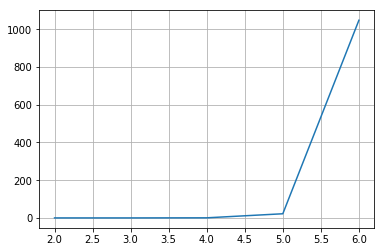

In [11]:
gdl = [2, 3, 4, 5, 6]
plt.plot(gdl, register)
plt.grid()

Si se analiza el tiempo de ejecución en relación del tiempo de ejecución máximo, es decir para 6 grados de libertad, los resultados son los siguientes:

In [20]:
for i in register:
    print(i / register[len(register)-1])

5.387361695142868e-07
2.2040881505062974e-05
0.0004951972360679559
0.02100833166674765
1.0


## Conclusión

Para observar el crecimiento exponencial, se muestra cuánto más grande es un tiempo de ejecución con relación al tiempo para un grado de libertad menos:

In [18]:
for i in range(0, len(register)-1):
    print(register[i+1]/register[i])

40.912199240185736
22.467215567317712
42.42416987938252
47.600162443304214


Se puede observar que incrementar en 1 la dimensión del espacio articular del robot implica escalar aproximadamente en 40 el tiempo de ejecución del programa.

La complejidad del algoritmo A* es O(b^d) siendo b la cantidad de estados vecinos y d el factor de ramificación o profundidad. 

Por lo tanto, para reducir el tiempo de ejecución debería modificarse la generación de estados vecinos aumentando su cantidad, y así obtener un árbol de estados más ancho pero de menor profundidad.

# Implementación de algoritmo A* para calcular camino más corto entre dos posiciones de un almacen

El problema del camino más corto entre dos posiciones de un almacen con un determinado layout, se modeló de tal forma que cada estado es una posición del almacén en coordenadas rectangulares. Estas coordenadas son tales que el (0, 0) se encuentra en la esquina superior izquierda, y x e y crecen hacia la derecha y abajo respectivamente.

La función heurística adoptada en el modelo es la raíz cuadrada de la suma del cuadrado de cada componente, distancia euclidiana del espacio de estados, desde el estado en cuestión al estado objetivo. Esto debido a que ya se encontraba implementado en el ejercicio anteriror.

El estado inicial es la posición inicial, por ejemplo (0, 0), y el estado final la posición objetivo. Se consideran posiciones válidas únicamente los pasillos, por lo que la posición de una determinada estantería o producto es ubicado estando en el pasillo frente a éste.

El algoritmo se implementó separando las funciones independientes del modelado del problema de las dependientes de éste. Por lo tanto aquellas funciones propias del algoritmo A* pudieron reutilizarse sin inconvenientes en ambos ejercicios sin necesidad de una nueva implementación. Para información más específica consultar documentación del código.